# QC Analysis of CTD Oxygen Data 
- from CTD Bottle samples and Winkler Titrations 

## Data Sources
- Seabird .btl files
- Oxy titration values from C.Mordy / E.Weisgarver
- Field notes and metadata

### Before importing here you must
- build the excel file

(currently these are all combined in an excel file - **TODO**: work from the orignal files)

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import pandas as pd
import numpy as np

In [114]:
source_file = '/Users/bell/ecoraid/2017/CTDcasts/dy1704/working/DiscreteOxygen/DY1704_Oxygen_Data.xlsx'

In [115]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [121]:
df = pd.read_excel(source_file,sheet_name='Comparison',date_parse='date_time',index_col='date_time')


In [160]:
df.dropna(subset=['cast','O2, uM/kg00','O2, uM/kg01','Sbeox0Mm/Kg','Sbeox1Mm/Kg'],inplace=True)
df

,cast,date,time,nb,Sal00,Sal11,Sbeox0Mm/Kg,Sbeox0PS,Sbeox1Mm/Kg,Sigma-t00,...,TurbWETntu0,BottleID,NiskinNo,Unnamed: 21,Cast,Niskin,O2 (uM/l),"O2, uM/kg00","O2, uM/kg01",Notes
date_time,,,,,,,,,,,,,,,,,,,,,
2017-04-27 00:46:32,ctd002,2017-04-27,00:46:32,2.0,31.7528,31.7513,342.922,93.796,343.685,25.5194,...,1.0845,265:2:CTD002,2,x,2.0,2.0,363.708,354.657353,354.657773,NaN
2017-04-27 02:46:32,ctd004,2017-04-27,02:46:32,7.0,31.5550,31.5559,438.809,124.477,441.242,25.3012,...,0.3111,277:7:CTD004,7,x,4.0,7.0,468.913,457.341726,457.343985,NaN
2017-04-27 05:11:55,ctd005,2017-04-27,05:11:55,1.0,31.8120,31.8101,334.768,92.328,335.700,25.5576,...,0.8478,285:1:CTD005,1,x,5.0,1.0,355.515,346.655301,346.655815,NaN
2017-04-27 10:50:35,ctd006,2017-04-27,10:50:35,6.0,31.4625,31.4695,444.153,126.462,446.670,25.2179,...,0.2595,286:6:CTD006,6,x,6.0,6.0,475.206,463.517043,463.514043,NaN
2017-04-28 01:59:57,ctd008,2017-04-28,01:59:57,10.0,31.5978,31.5940,418.825,121.949,421.835,25.2783,...,0.2104,288:10:CTD008,10,x,8.0,10.0,447.108,436.084524,436.086120,NaN
2017-04-28 04:47:36,ctd009,2017-04-28,04:47:36,1.0,31.9598,31.9578,311.977,87.753,314.080,25.6486,...,0.9356,292:1:CTD009,1,x,9.0,1.0,331.480,323.190566,323.191071,NaN
2017-04-28 08:40:27,ctd010,2017-04-28,08:40:27,7.0,31.4309,31.4290,424.395,123.309,427.240,25.1465,...,0.2039,293:7:CTD010,7,x,10.0,7.0,454.510,443.361009,443.361649,NaN
2017-04-28 10:31:10,ctd011,2017-04-28,10:31:10,1.0,31.9869,31.9843,312.035,87.581,313.865,25.6745,...,0.8894,346:1:CTD011,1,x,11.0,1.0,331.961,323.651366,323.652034,NaN
2017-04-28 12:03:26,ctd012,2017-04-28,12:03:26,2.0,31.9350,31.9325,320.879,89.322,322.762,25.6452,...,0.9570,351;352:2;4:CTD012,2;4,x,12.0,2.0,340.888,332.364411,332.365062,NaN


### Bottle-Winkler(Flask) Oxygen
(referred to as Offset)

Text(0.5,0,'Temperature')

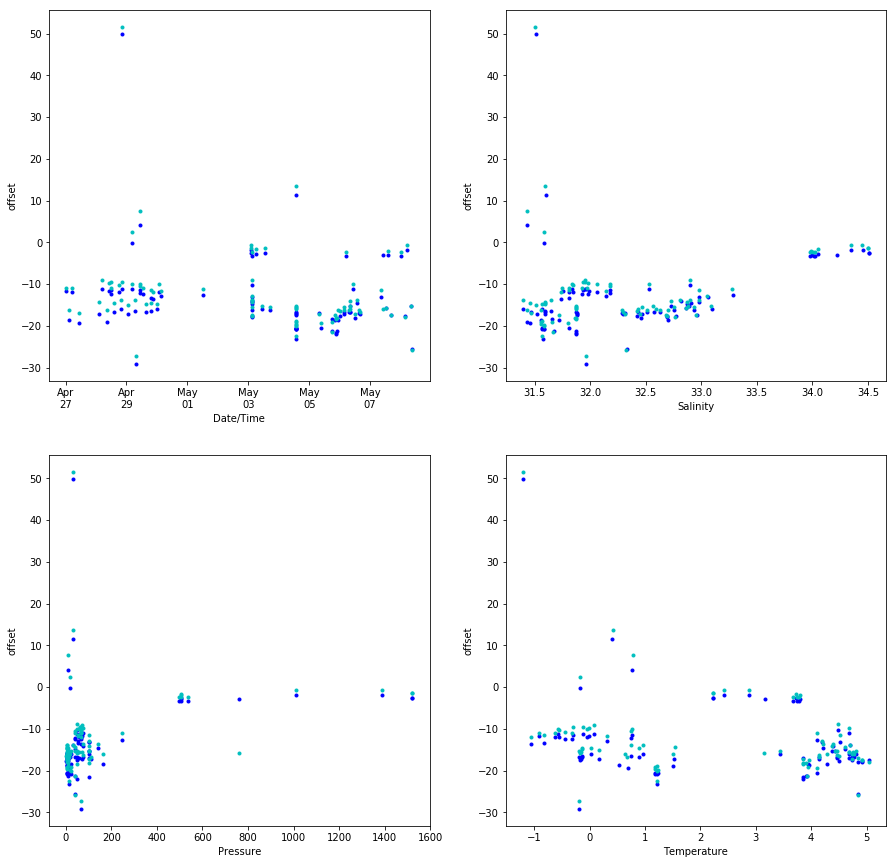

In [185]:
fig, ax = plt.subplots(2,2,'none',figsize=(15, 15))
plt.subplot(221)
plt.plot(df.index,(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df.index,(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
ax = plt.gca()
xfmt = mdates.DateFormatter('%b\n%d')
ax.xaxis.set_major_formatter(xfmt)
plt.ylabel('offset')
plt.xlabel('Date/Time')

plt.subplot(222)
plt.plot(df['Sal00'],(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df['Sal11'],(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Salinity')

plt.subplot(223)
plt.plot(df['PrDM'],(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df['PrDM'],(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Pressure')

plt.subplot(224)
plt.plot(df['T090C'],(df['Sbeox0Mm/Kg']-df['O2, uM/kg00']),'b.')
plt.plot(df['T190C'],(df['Sbeox1Mm/Kg']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Temperature')


In [167]:
z1 = np.polyfit(x=df['Sbeox0Mm/Kg'].values, y=df['O2, uM/kg00'].values, deg=1)
z2 = np.polyfit(x=df['Sbeox1Mm/Kg'].values, y=df['O2, uM/kg01'].values, deg=1)
p1 = np.poly1d(z1)
p2 = np.poly1d(z2)
df['trendline1'] = p1(df['Sbeox0Mm/Kg'].values)
df['trendline2'] = p2(df['Sbeox1Mm/Kg'].values)

Text(0.5,0,'SBE CTD Oxygens uM/kg')

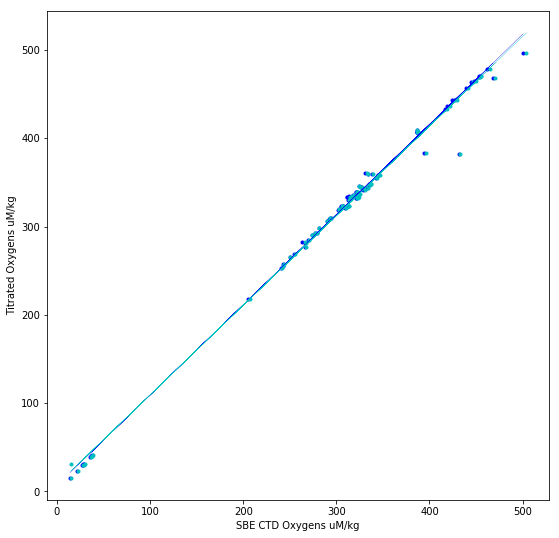

In [186]:
fig, ax = plt.subplots(figsize=(9, 9))
plt.plot(df['Sbeox0Mm/Kg'],df['O2, uM/kg00'],'b.')
plt.plot(df['Sbeox1Mm/Kg'],df['O2, uM/kg01'],'c.')
plt.plot(df['Sbeox0Mm/Kg'],df['trendline1'],'b--',linewidth=0.25)
plt.plot(df['Sbeox1Mm/Kg'],df['trendline2'],'c--',linewidth=0.25)
plt.ylabel('Titrated Oxygens uM/kg')
plt.xlabel('SBE CTD Oxygens uM/kg')

In [177]:
print('Primary: y={0:.3f} x + {1:.2f}'.format(z1[0],z1[1]))
print('Secondary: y={0:.3f} x + {1:.2f}'.format(z2[0],z2[1]))

Primary: y=1.021 x + 7.13
Secondary: y=1.015 x + 7.85


#### Correct for linear fit

In [188]:
df['Primary'] = 1.021 * df['Sbeox0Mm/Kg'] + 7.13
df['Secondary'] = 1.015 * df['Sbeox1Mm/Kg'] + 7.85

Text(0.5,0,'Temperature')

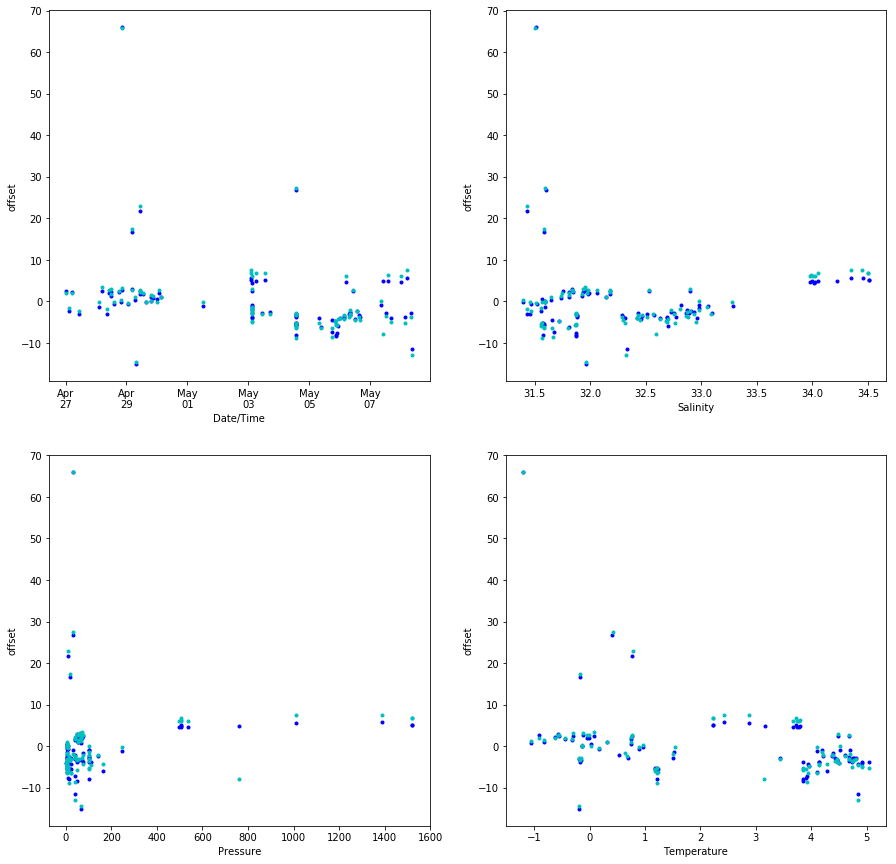

In [189]:
fig, ax = plt.subplots(2,2,'none',figsize=(15, 15))
plt.subplot(221)
plt.plot(df.index,(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df.index,(df['Secondary']-df['O2, uM/kg01']),'c.')
ax = plt.gca()
xfmt = mdates.DateFormatter('%b\n%d')
ax.xaxis.set_major_formatter(xfmt)
plt.ylabel('offset')
plt.xlabel('Date/Time')

plt.subplot(222)
plt.plot(df['Sal00'],(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df['Sal11'],(df['Secondary']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Salinity')

plt.subplot(223)
plt.plot(df['PrDM'],(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df['PrDM'],(df['Secondary']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Pressure')

plt.subplot(224)
plt.plot(df['T090C'],(df['Primary']-df['O2, uM/kg00']),'b.')
plt.plot(df['T190C'],(df['Secondary']-df['O2, uM/kg01']),'c.')
plt.ylabel('offset')
plt.xlabel('Temperature')
